In [1]:
from pymonntorch import *
import torch

import matplotlib.pyplot as plt

from models.activity import ActivityRecorder
from models.dendrites import Dendrite
from models.currents import ConstantCurrent, NoisyCurrent, SetCurrent, CurrentSum
from models.encoders import TimeToFirstSpikeEncoder, NumberEncoder, PoissonEncoder
from models.neurons import LIF
from models.synapses import SimpleSynapse, FullyConnectedSynapse, RandomConnectedFixedProbSynapse, \
    RandomConnectedFixedInputSynapse
from models.time_res import TimeResolution
from simulate import Simulation
from utils.images import CustomImage


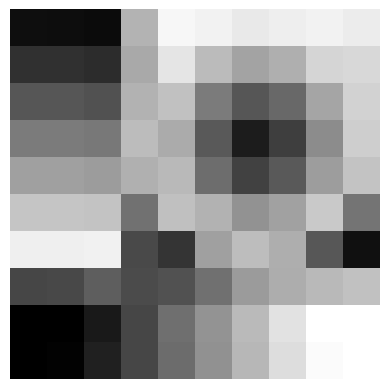

In [2]:
img1 = CustomImage('dataset/slope.tif')
img1.resize_image(10, 10)
img1.img_show()

In [3]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_exc1 = sim.add_neuron_group(
    tag="ng_exc1",
    size=10,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=1),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: TimeToFirstSpikeEncoder(data=img1.img2tensor(),
                                   duration=50,
                                   sleep=50,
                                   theta=1,
                                   ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)

sim.simulate(iterations=200)

Network['Network_1', 'Network'](Neurons: tensor(10)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](10){1:SetCurrent(value=0,)2:ConstantCurrent(value=1,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:TimeToFirstSpikeEncoder(data=tensor([ 14,  13,  11, 179, 247, 242, 233, 238, 242, 236,  48,  48,  45, 169,
        229, 187, 163, 175, 213, 216,  86,  86,  82, 178, 193, 123,  86, 104,
        165, 210, 123, 123, 120, 188, 171,  89,  28,  62, 140, 206, 160, 160,
        156, 176, 185, 109,  66,  89, 157, 195, 197, 197, 196, 113, 192, 178,
        146, 161, 201, 116, 239, 239, 241,  73,  53, 160, 189, 174,  87,  16,
         70,  72,  94,  75,  82, 112, 155, 173, 185, 193,   0,   0,  25,  70,
        111, 148, 186, 226, 255, 255,   0,   2,  32,  70, 108, 145, 183, 221,
        251, 255], dtype=torch.uint8),duration=50,sleep=50,theta=1,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 

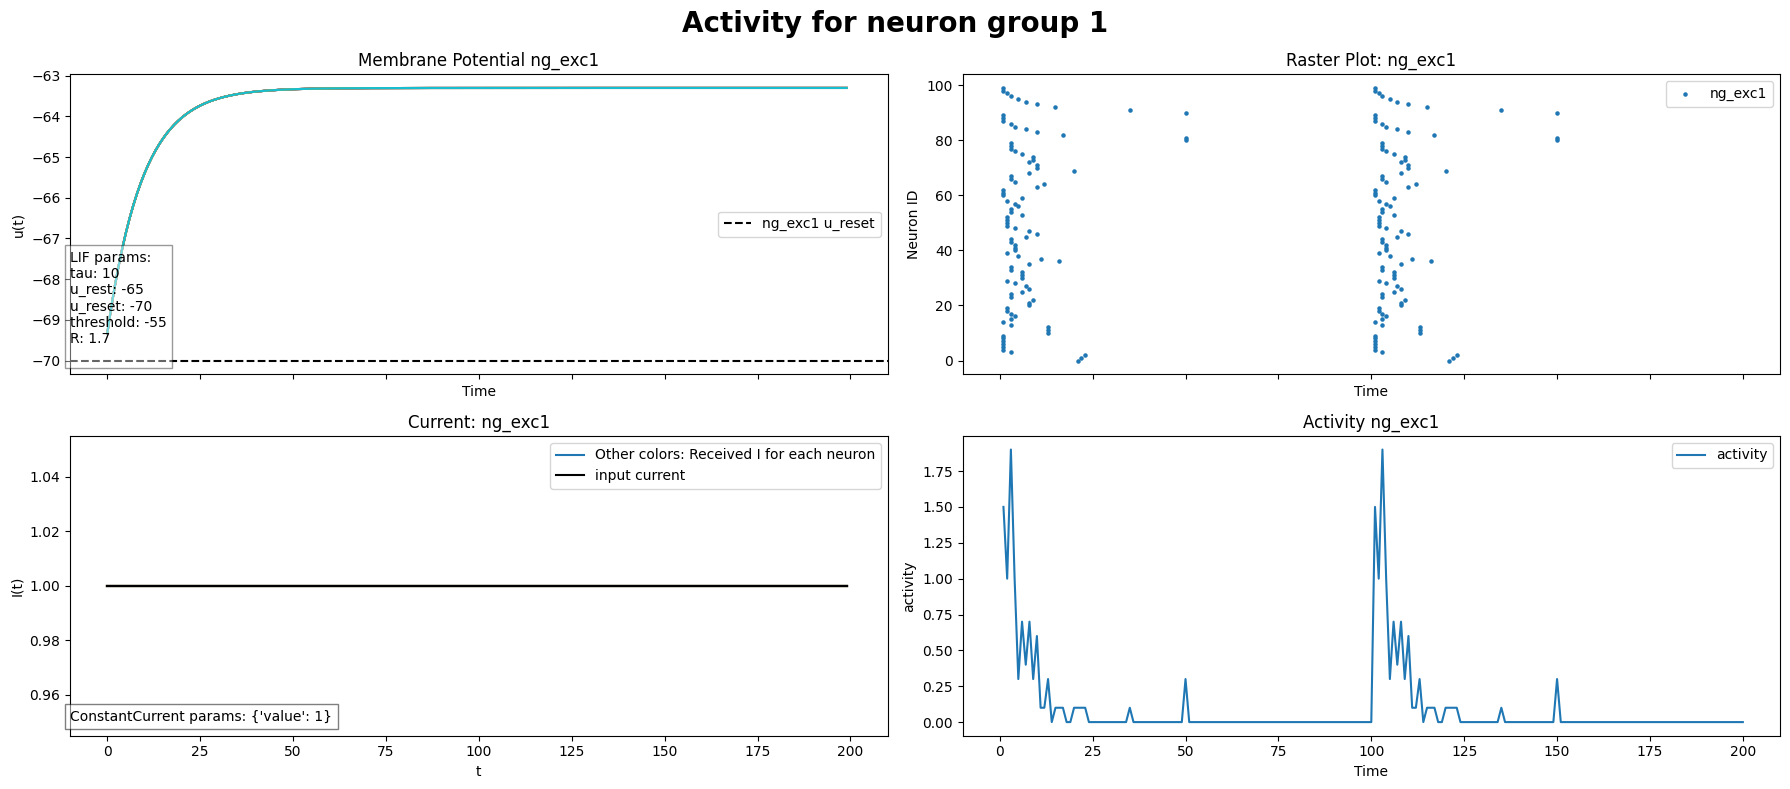

In [4]:
# %%
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc1.add_membrane_potential_plot(axs[0, 0], model_idx=6)
ng_exc1.add_neuron_model_params_info(axs[0, 0], model_idx=6)

ng_exc1.add_raster_plot(axs[0, 1])

ng_exc1.add_current_plot(axs[1, 0])
ng_exc1.add_current_params_info(axs[1,0], current_idx=2)

ng_exc1.add_activity_plot(axs[1, 1])
fig.suptitle("Activity for neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
# plt.savefig("part1-Simple-ng-without-synapse.pdf")
plt.show()

In [5]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_exc1 = sim.add_neuron_group(
    tag="ng_exc1",
    size=10,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=1),
        3: CurrentSum(),
        7: NumberEncoder(num=4.7,
                         duration=20),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)

sim.simulate(iterations=20)

Network['Network_1', 'Network'](Neurons: tensor(10)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](10){1:SetCurrent(value=0,)2:ConstantCurrent(value=1,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:NumberEncoder(num=4.7,duration=20,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
20xBatch: 1/1 (100%) 10.825ms


/home/amir/Documents/university/Semester 8/Neuroscience/hw3/models/encoders.py:59: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  self.x_values = torch.tensor([np.linspace(self.lower_bound, self.upper_bound, 1000) for mean in


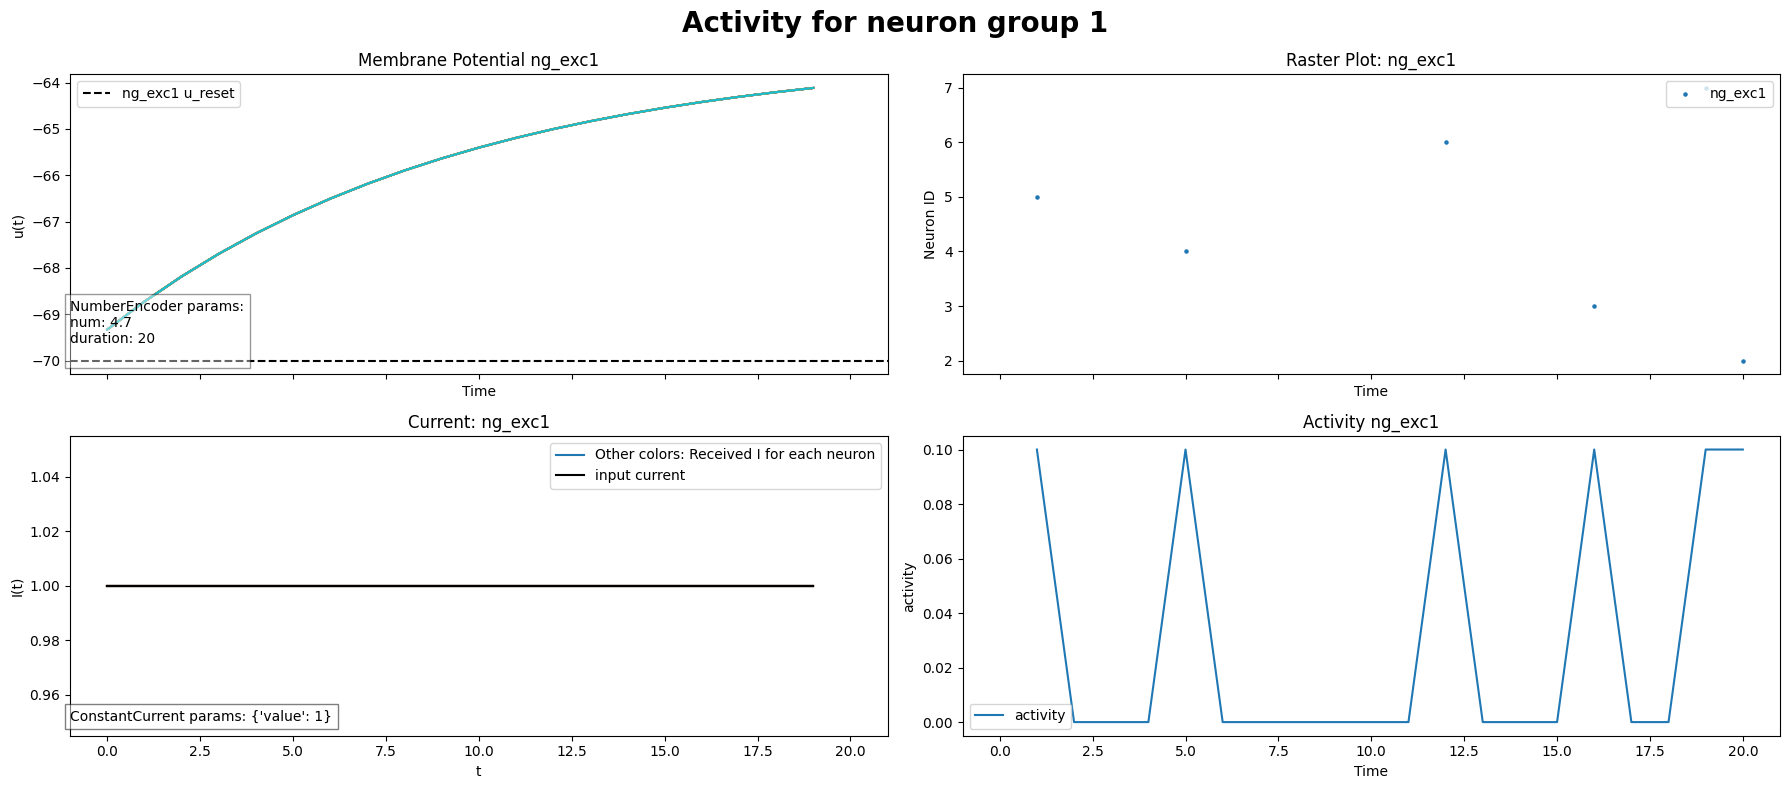

In [6]:
# %%
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc1.add_membrane_potential_plot(axs[0, 0], model_idx=6)
ng_exc1.add_neuron_model_params_info(axs[0, 0], model_idx=7)
ng_exc1.add_current_plot(axs[1, 0])
ng_exc1.add_current_params_info(axs[1,0], current_idx=2)
ng_exc1.add_raster_plot(axs[0, 1])
ng_exc1.add_activity_plot(axs[1, 1])
fig.suptitle("Activity for neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
# plt.savefig("part1-Simple-ng-without-synapse.pdf")
plt.show()

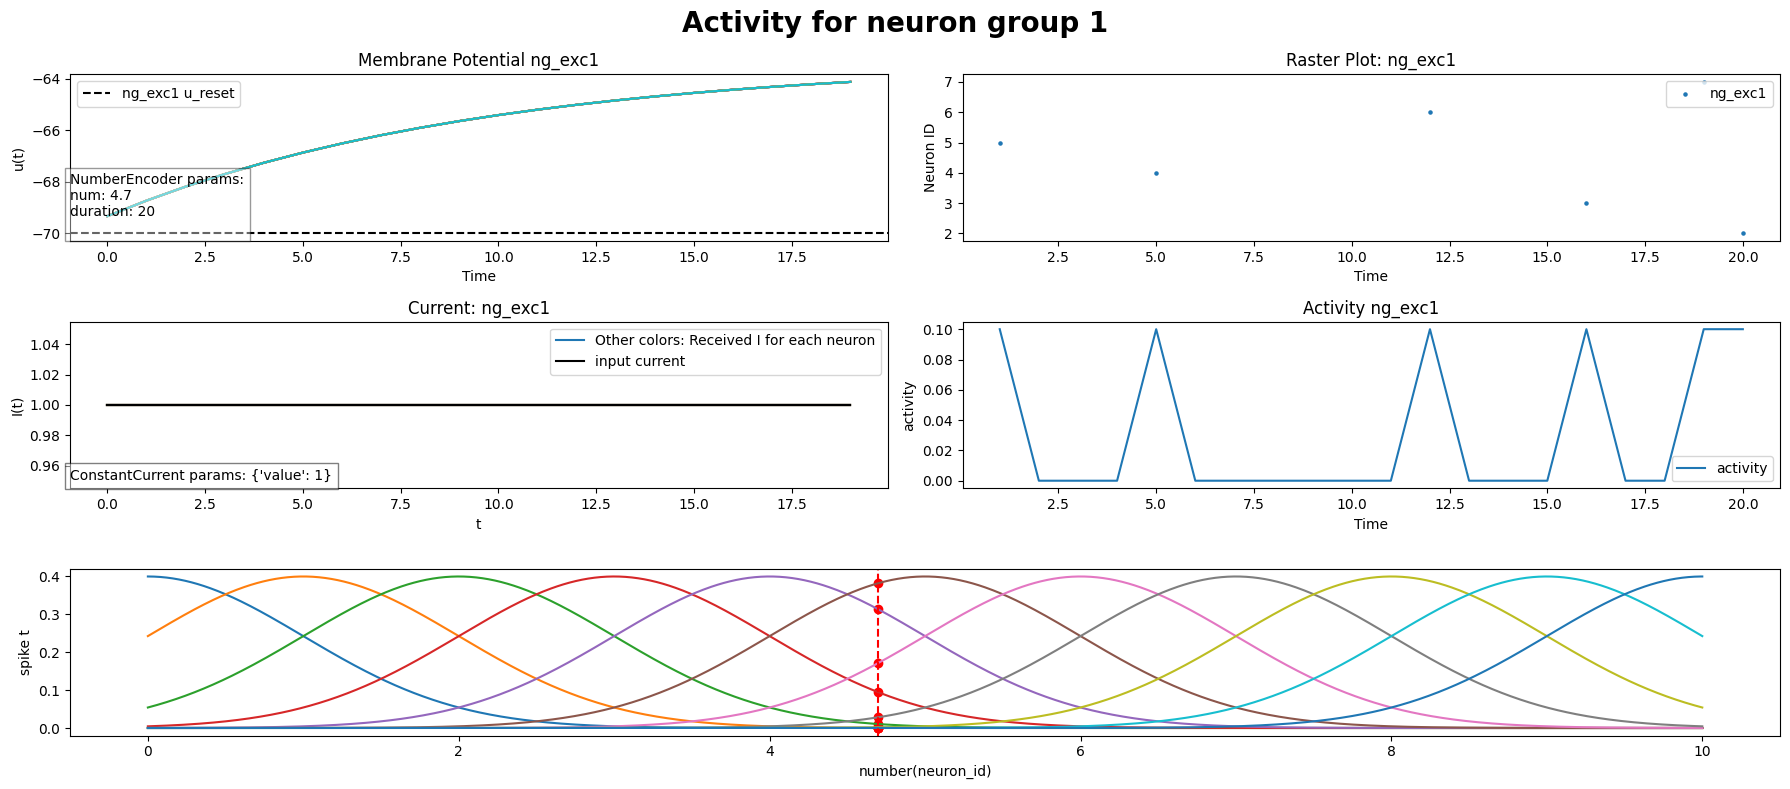

In [7]:
# %%
fig = plt.figure(figsize=(18, 8))

gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, :])

ng_exc1.add_membrane_potential_plot(ax1, model_idx=6)
ng_exc1.add_neuron_model_params_info(ax1, model_idx=7)

ng_exc1.add_raster_plot(ax2)

ng_exc1.add_current_plot(ax3)
ng_exc1.add_current_params_info(ax3, current_idx=2)

ng_exc1.add_activity_plot(ax4)

ng_exc1.behavior[7].plot_x(ax5)
fig.suptitle("Activity for neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
# plt.savefig("part1-Simple-ng-without-synapse.pdf")
plt.show()

In [8]:
ng_exc1.spike

tensor([False, False,  True, False, False, False, False, False, False, False,
        False])

In [9]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}),)
ng_exc1 = sim.add_neuron_group(
    tag="ng_exc1",
    size=10,
    behavior={
        1: SetCurrent(value=0),
        2: ConstantCurrent(value=1),
        3: CurrentSum(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
        ),
        7: PoissonEncoder(data=[2,3,1,9,0,0,0,0],
                                   duration=50,
                                   sleep=50,
                                   theta=1,
                                   ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I", "inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)

sim.simulate(iterations=60)

Network['Network_1', 'Network'](Neurons: tensor(10)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](10){1:SetCurrent(value=0,)2:ConstantCurrent(value=1,)3:CurrentSum()6:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,)7:PoissonEncoder(data=tensor([ 14,  13,  11, 179, 247, 242, 233, 238, 242, 236,  48,  48,  45, 169,
        229, 187, 163, 175, 213, 216,  86,  86,  82, 178, 193, 123,  86, 104,
        165, 210, 123, 123, 120, 188, 171,  89,  28,  62, 140, 206, 160, 160,
        156, 176, 185, 109,  66,  89, 157, 195, 197, 197, 196, 113, 192, 178,
        146, 161, 201, 116, 239, 239, 241,  73,  53, 160, 189, 174,  87,  16,
         70,  72,  94,  75,  82, 112, 155, 173, 185, 193,   0,   0,  25,  70,
        111, 148, 186, 226, 255, 255,   0,   2,  32,  70, 108, 145, 183, 221,
        251, 255], dtype=torch.uint8),duration=50,sleep=50,theta=1,)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity

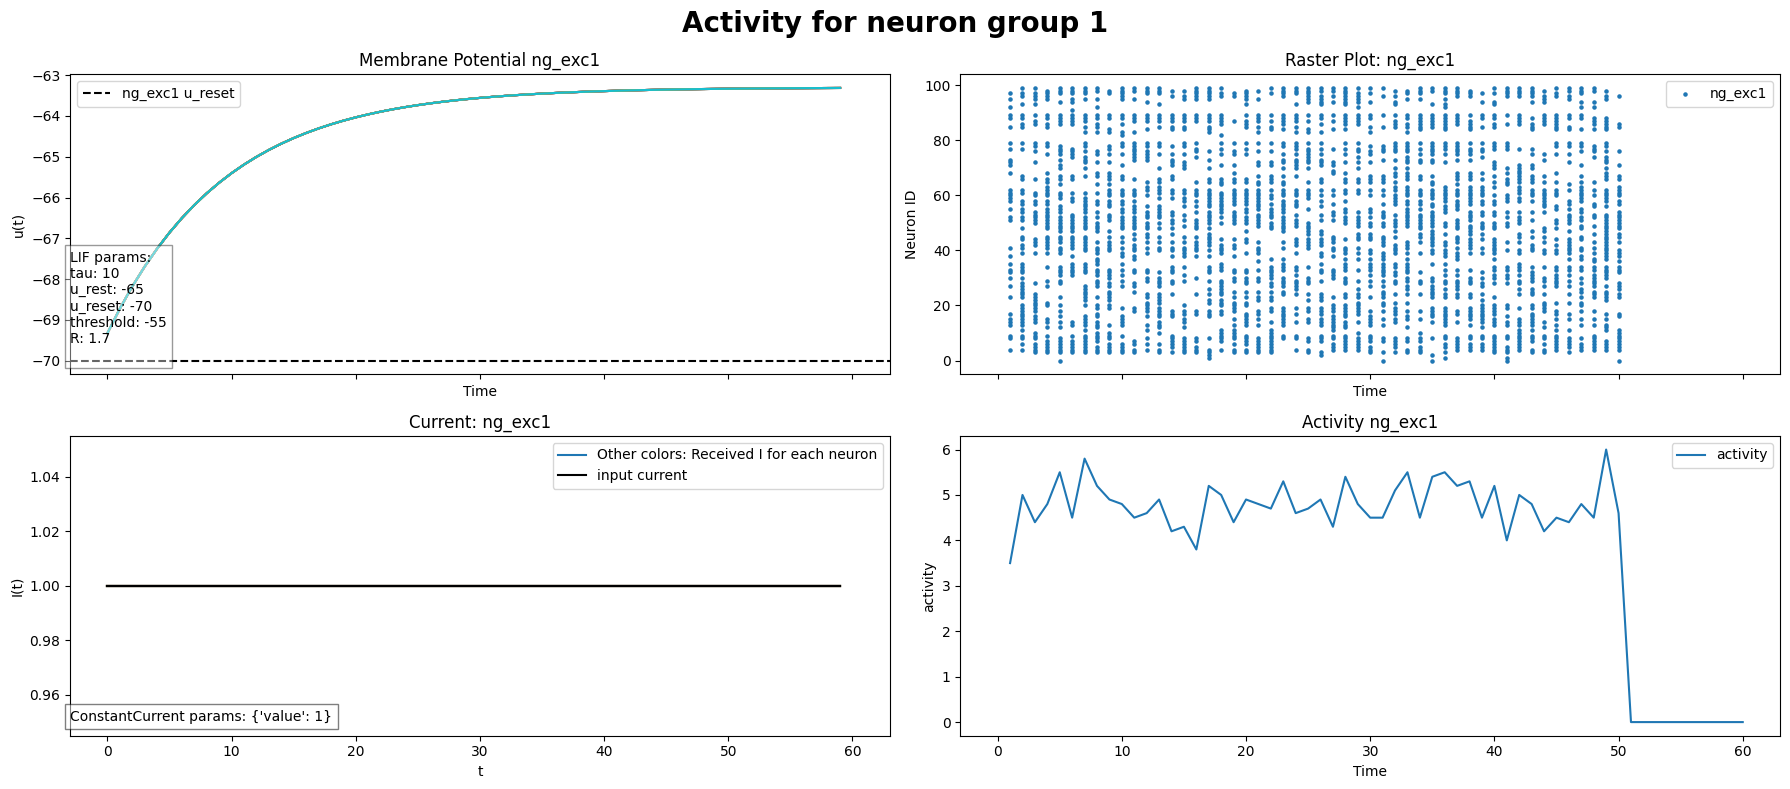

In [10]:
# %%
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc1.add_membrane_potential_plot(axs[0, 0], model_idx=6)
ng_exc1.add_neuron_model_params_info(axs[0, 0], model_idx=6)

ng_exc1.add_raster_plot(axs[0, 1])

ng_exc1.add_current_plot(axs[1, 0])
ng_exc1.add_current_params_info(axs[1,0], current_idx=2)

ng_exc1.add_activity_plot(axs[1, 1])
fig.suptitle("Activity for neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
# plt.savefig("part1-Simple-ng-without-synapse.pdf")
plt.show()